In [1]:
# Parameters
file_path = "NVDA.csv"


<a href="https://colab.research.google.com/github/AshtonGlover/stock-prediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [3]:
import pandas as pd
import tensorflow

truncated_name = file_path.split(".")[0]
file_path = "datasets/" + file_path if 'file_path' in globals() else 'datasets/MSFT.csv'

df = pd.read_csv(file_path)

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-23,45.866001,47.200001,45.208000,47.116001,47.101902,779046000
1,2023-08-24,50.216000,50.265999,47.159000,47.162998,47.148884,1156044000
2,2023-08-25,47.012001,47.805000,45.023998,46.018002,46.004227,925341000
3,2023-08-28,46.481998,46.980000,44.888000,46.834999,46.820984,685192000
4,2023-08-29,46.666000,49.081001,46.390999,48.784000,48.769402,701397000
...,...,...,...,...,...,...,...
247,2024-08-16,121.940002,125.000000,121.180000,124.580002,124.580002,302589900
248,2024-08-19,124.279999,130.000000,123.419998,130.000000,130.000000,318333600
249,2024-08-20,128.399994,129.880005,125.889999,127.250000,127.250000,300087400
250,2024-08-21,127.320000,129.350006,126.660004,128.500000,128.500000,257883600


In [4]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2023-08-23,47.116001
1,2023-08-24,47.162998
2,2023-08-25,46.018002
3,2023-08-28,46.834999
4,2023-08-29,48.784000
...,...,...
247,2024-08-16,124.580002
248,2024-08-19,130.000000
249,2024-08-20,127.250000
250,2024-08-21,128.500000


In [5]:
import datetime

def strToDate(s):
  split_date = s.split('-')
  day, month, year = int(split_date[2]), int(split_date[1]), int(split_date[0])
  return datetime.datetime(year = year, month = month, day = day)

In [6]:
df['Date'] = df['Date'].apply(strToDate)
df['Date']

/var/folders/t5/bfwy3czx4ks1lybmc4f9rd5m0000gn/T/ipykernel_88259/3418807745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(strToDate)


0     2023-08-23
1     2023-08-24
2     2023-08-25
3     2023-08-28
4     2023-08-29
         ...    
247   2024-08-16
248   2024-08-19
249   2024-08-20
250   2024-08-21
251   2024-08-22
Name: Date, Length: 252, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2023-08-23,47.116001
2023-08-24,47.162998
2023-08-25,46.018002
2023-08-28,46.834999
2023-08-29,48.784000
...,...
2024-08-16,124.580002
2024-08-19,130.000000
2024-08-20,127.250000


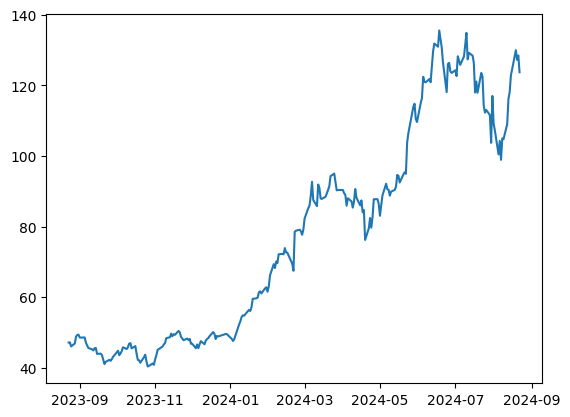

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = strToDate(first_date_str)
  last_date  = strToDate(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(len(df_subset))
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,
                                '2023-10-05',
                                '2024-08-22',
                                n=30)
windowed_df

,Target Date,Target-30,Target-29,Target-28,Target-27,Target-26,Target-25,Target-24,Target-23,Target-22,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2023-10-05,47.116001,47.162998,46.018002,46.834999,48.784000,49.264000,49.355000,48.508999,48.548000,...,41.610001,42.222000,41.910999,42.467999,43.089001,43.499001,44.782001,43.516998,44.041000,44.688000
1,2023-10-06,47.162998,46.018002,46.834999,48.784000,49.264000,49.355000,48.508999,48.548000,47.061001,...,42.222000,41.910999,42.467999,43.089001,43.499001,44.782001,43.516998,44.041000,44.688000,45.762001
2,2023-10-09,46.018002,46.834999,48.784000,49.264000,49.355000,48.508999,48.548000,47.061001,46.241001,...,41.910999,42.467999,43.089001,43.499001,44.782001,43.516998,44.041000,44.688000,45.762001,45.272999
3,2023-10-10,46.834999,48.784000,49.264000,49.355000,48.508999,48.548000,47.061001,46.241001,45.571999,...,42.467999,43.089001,43.499001,44.782001,43.516998,44.041000,44.688000,45.762001,45.272999,45.798000
4,2023-10-11,48.784000,49.264000,49.355000,48.508999,48.548000,47.061001,46.241001,45.571999,45.178001,...,43.089001,43.499001,44.782001,43.516998,44.041000,44.688000,45.762001,45.272999,45.798000,46.806000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2024-08-16,125.830002,128.199997,131.380005,134.910004,127.400002,129.240005,128.440002,126.360001,117.989998,...,100.449997,104.250000,98.910004,104.970001,104.750000,109.019997,116.139999,118.080002,122.860001,124.580002
218,2024-08-19,128.199997,131.380005,134.910004,127.400002,129.240005,128.440002,126.360001,117.989998,121.089996,...,104.250000,98.910004,104.970001,104.750000,109.019997,116.139999,118.080002,122.860001,124.580002,130.000000
219,2024-08-20,131.380005,134.910004,127.400002,129.240005,128.440002,126.360001,117.989998,121.089996,117.930000,...,98.910004,104.970001,104.750000,109.019997,116.139999,118.080002,122.860001,124.580002,130.000000,127.250000
220,2024-08-21,134.910004,127.400002,129.240005,128.440002,126.360001,117.989998,121.089996,117.930000,123.540001,...,104.970001,104.750000,109.019997,116.139999,118.080002,122.860001,124.580002,130.000000,127.250000,128.500000


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  dfasnp = windowed_dataframe.to_numpy()

  dates = dfasnp[:, 0]

  middle_matrix = dfasnp[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = dfasnp[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((222,), (222, 30, 1), (222,))

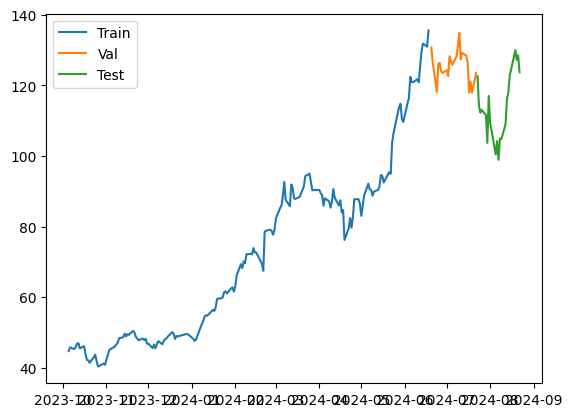

In [11]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, x_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, x_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

dates_test, x_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Val', 'Test'])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential([
                    layers.Input(shape=(30, 1)),

                    layers.LSTM(units=256),

                    layers.Dense(units=256, activation='relu'),
                    layers.Dense(units=128, activation='relu'),
                    layers.Dense(units=64, activation='relu'),
                    layers.Dense(units=32, activation='relu'),
                    layers.Dense(units=1)
                ])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 100)



Epoch 1/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 4s 805ms/step - loss: 5765.2324 - mean_absolute_error: 71.1676

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5893.8809 - mean_absolute_error: 72.4448 

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 5725.2646 - mean_absolute_error: 71.3865 - val_loss: 14743.8350 - val_mean_absolute_error: 121.3487


Epoch 2/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4596.8750 - mean_absolute_error: 62.7492

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4807.3188 - mean_absolute_error: 64.6987

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4748.0605 - mean_absolute_error: 64.2218 - val_loss: 12273.8652 - val_mean_absolute_error: 110.7040


Epoch 3/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3539.9631 - mean_absolute_error: 54.5043

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3423.7419 - mean_absolute_error: 51.5519

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3215.2346 - mean_absolute_error: 49.2777 - val_loss: 6727.6123 - val_mean_absolute_error: 81.9046


Epoch 4/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 893.5504 - mean_absolute_error: 21.6311

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 906.9158 - mean_absolute_error: 23.2538

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 925.6754 - mean_absolute_error: 23.7242

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 932.4465 - mean_absolute_error: 23.8684 - val_loss: 1581.4351 - val_mean_absolute_error: 39.5115


Epoch 5/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 1499.4133 - mean_absolute_error: 33.3519

2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1392.7379 - mean_absolute_error: 31.6421

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1260.5662 - mean_absolute_error: 29.6034

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1208.7592 - mean_absolute_error: 28.9082

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 1143.0615 - mean_absolute_error: 28.0676 - val_loss: 3151.9729 - val_mean_absolute_error: 55.9731


Epoch 6/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 350.6723 - mean_absolute_error: 17.0988

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 436.8531 - mean_absolute_error: 18.4187

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 517.0815 - mean_absolute_error: 19.5012

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 535.1207 - mean_absolute_error: 19.7360 - val_loss: 4019.5320 - val_mean_absolute_error: 63.2543


Epoch 7/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 758.0118 - mean_absolute_error: 22.1374

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 699.6817 - mean_absolute_error: 21.6791

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 657.5531 - mean_absolute_error: 21.0914 - val_loss: 2803.0010 - val_mean_absolute_error: 52.7712


Epoch 8/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 524.4675 - mean_absolute_error: 18.5472

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 437.9663 - mean_absolute_error: 17.3250

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 433.2775 - mean_absolute_error: 17.3136 - val_loss: 1785.2130 - val_mean_absolute_error: 42.0396


Epoch 9/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 486.6617 - mean_absolute_error: 18.6366

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 381.2643 - mean_absolute_error: 16.2728

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 363.1261 - mean_absolute_error: 15.8248 - val_loss: 1546.2719 - val_mean_absolute_error: 39.1033


Epoch 10/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 236.1186 - mean_absolute_error: 11.3053

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 195.3539 - mean_absolute_error: 10.4407

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 188.5138 - mean_absolute_error: 10.1971 - val_loss: 1089.9448 - val_mean_absolute_error: 32.7624


Epoch 11/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 168.2596 - mean_absolute_error: 8.3018

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 106.0977 - mean_absolute_error: 6.1344

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 98.8101 - mean_absolute_error: 5.8821 - val_loss: 547.0325 - val_mean_absolute_error: 23.0458


Epoch 12/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 82.7525 - mean_absolute_error: 5.9030

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 50.8742 - mean_absolute_error: 4.2734

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 47.7006 - mean_absolute_error: 4.1170 - val_loss: 170.2385 - val_mean_absolute_error: 12.4373


Epoch 13/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 15.4622 - mean_absolute_error: 3.2385

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 31.1916 - mean_absolute_error: 3.9475

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 30.7141 - mean_absolute_error: 3.9168 - val_loss: 91.7850 - val_mean_absolute_error: 8.7896


Epoch 14/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 16.2016 - mean_absolute_error: 2.9866

2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 19.4328 - mean_absolute_error: 3.0643

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 20.4672 - mean_absolute_error: 3.1351

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 19.4650 - mean_absolute_error: 3.0712

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 19.1403 - mean_absolute_error: 3.0525 - val_loss: 40.6622 - val_mean_absolute_error: 5.7216


Epoch 15/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 13.9595 - mean_absolute_error: 2.5698

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 12.6681 - mean_absolute_error: 2.4672

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 12.3529 - mean_absolute_error: 2.4369 - val_loss: 15.3903 - val_mean_absolute_error: 3.0661


Epoch 16/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.4371 - mean_absolute_error: 1.5694

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.6336 - mean_absolute_error: 1.7659

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.0178 - mean_absolute_error: 1.8181 - val_loss: 15.7195 - val_mean_absolute_error: 3.0616


Epoch 17/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.9594 - mean_absolute_error: 2.1050

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.8602 - mean_absolute_error: 2.0852

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.2625 - mean_absolute_error: 1.9880 - val_loss: 27.0063 - val_mean_absolute_error: 4.1166


Epoch 18/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3.3667 - mean_absolute_error: 1.4018

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.2283 - mean_absolute_error: 1.5859

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.6599 - mean_absolute_error: 1.6363 - val_loss: 36.2159 - val_mean_absolute_error: 4.9652


Epoch 19/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.9443 - mean_absolute_error: 1.8887

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.1904 - mean_absolute_error: 1.7794

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.3976 - mean_absolute_error: 1.7933 - val_loss: 40.0802 - val_mean_absolute_error: 5.3257


Epoch 20/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.0108 - mean_absolute_error: 1.2897

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 5.4474 - mean_absolute_error: 1.6489

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.0039 - mean_absolute_error: 1.7121 - val_loss: 43.9241 - val_mean_absolute_error: 5.6556


Epoch 21/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8694 - mean_absolute_error: 1.6293

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.9112 - mean_absolute_error: 1.5090

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.8107 - mean_absolute_error: 1.6049 - val_loss: 35.6774 - val_mean_absolute_error: 4.9214


Epoch 22/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.6254 - mean_absolute_error: 1.7794

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.8481 - mean_absolute_error: 1.6156

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.7111 - mean_absolute_error: 1.6086 - val_loss: 27.1154 - val_mean_absolute_error: 4.1767


Epoch 23/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.5000 - mean_absolute_error: 1.7964

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.8353 - mean_absolute_error: 1.6671

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.9114 - mean_absolute_error: 1.6486 - val_loss: 27.4842 - val_mean_absolute_error: 4.2106


Epoch 24/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.5480 - mean_absolute_error: 1.5748

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.1425 - mean_absolute_error: 1.6125

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.9519 - mean_absolute_error: 1.6200 - val_loss: 23.7106 - val_mean_absolute_error: 3.8688


Epoch 25/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.8015 - mean_absolute_error: 1.8672

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.3669 - mean_absolute_error: 1.6682

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.3778 - mean_absolute_error: 1.6646 - val_loss: 40.5009 - val_mean_absolute_error: 5.3596


Epoch 26/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.2086 - mean_absolute_error: 1.2716

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.1076 - mean_absolute_error: 1.4929

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.4850 - mean_absolute_error: 1.5553 - val_loss: 36.6598 - val_mean_absolute_error: 5.0082


Epoch 27/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.6137 - mean_absolute_error: 1.8274

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.8368 - mean_absolute_error: 1.6196

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.7734 - mean_absolute_error: 1.5951 - val_loss: 33.9974 - val_mean_absolute_error: 4.7683


Epoch 28/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9225 - mean_absolute_error: 1.6375

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.6382 - mean_absolute_error: 1.5802

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.7521 - mean_absolute_error: 1.5884 - val_loss: 46.2769 - val_mean_absolute_error: 5.8434


Epoch 29/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.1502 - mean_absolute_error: 1.7299

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.2888 - mean_absolute_error: 1.8477

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.1658 - mean_absolute_error: 1.8299 - val_loss: 39.8492 - val_mean_absolute_error: 5.3028


Epoch 30/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.6690 - mean_absolute_error: 2.0481

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.9256 - mean_absolute_error: 1.7905

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.8460 - mean_absolute_error: 1.7676 - val_loss: 46.7173 - val_mean_absolute_error: 5.8791


Epoch 31/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.4886 - mean_absolute_error: 1.0379

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.8010 - mean_absolute_error: 1.4752

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.3510 - mean_absolute_error: 1.5497 - val_loss: 52.9885 - val_mean_absolute_error: 6.3569


Epoch 32/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.6492 - mean_absolute_error: 1.6971

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.6926 - mean_absolute_error: 1.6664

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.9585 - mean_absolute_error: 1.6906 - val_loss: 64.1044 - val_mean_absolute_error: 7.0105


Epoch 33/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.4439 - mean_absolute_error: 1.6688

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.0890 - mean_absolute_error: 1.9057

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.9178 - mean_absolute_error: 1.8959 - val_loss: 46.3272 - val_mean_absolute_error: 5.7711


Epoch 34/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.6627 - mean_absolute_error: 2.0455

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.9006 - mean_absolute_error: 1.7827

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.0738 - mean_absolute_error: 1.7809 - val_loss: 38.9424 - val_mean_absolute_error: 5.2116


Epoch 35/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.4081 - mean_absolute_error: 1.4217

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.6996 - mean_absolute_error: 1.5462

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.9163 - mean_absolute_error: 1.5782 - val_loss: 44.7387 - val_mean_absolute_error: 5.5934


Epoch 36/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.4946 - mean_absolute_error: 1.6877

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.0156 - mean_absolute_error: 1.7499

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.8745 - mean_absolute_error: 1.7347 - val_loss: 40.1210 - val_mean_absolute_error: 5.2004


Epoch 37/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.7713 - mean_absolute_error: 1.9166

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.3735 - mean_absolute_error: 1.7992

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.1030 - mean_absolute_error: 1.7568 - val_loss: 43.1661 - val_mean_absolute_error: 5.4296


Epoch 38/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.1029 - mean_absolute_error: 1.6173

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.0917 - mean_absolute_error: 1.5929

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.2878 - mean_absolute_error: 1.6254 - val_loss: 38.8761 - val_mean_absolute_error: 5.0632


Epoch 39/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.5860 - mean_absolute_error: 1.6429

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.5639 - mean_absolute_error: 1.7517

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.8250 - mean_absolute_error: 1.7889 - val_loss: 62.7176 - val_mean_absolute_error: 6.8103


Epoch 40/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.8383 - mean_absolute_error: 1.8557

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.7315 - mean_absolute_error: 1.8143

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.6832 - mean_absolute_error: 1.7861 - val_loss: 70.9280 - val_mean_absolute_error: 7.3860


Epoch 41/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.8934 - mean_absolute_error: 1.2346

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.8023 - mean_absolute_error: 1.5266

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.8939 - mean_absolute_error: 1.5338 - val_loss: 77.4185 - val_mean_absolute_error: 7.8450


Epoch 42/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.7604 - mean_absolute_error: 1.5567

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.4812 - mean_absolute_error: 1.5364

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.6443 - mean_absolute_error: 1.5688 - val_loss: 89.1752 - val_mean_absolute_error: 8.5689


Epoch 43/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.1649 - mean_absolute_error: 2.1681

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.0966 - mean_absolute_error: 1.9382

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.0129 - mean_absolute_error: 1.9324 - val_loss: 93.3525 - val_mean_absolute_error: 8.8097


Epoch 44/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 12.8421 - mean_absolute_error: 2.6945

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.2222 - mean_absolute_error: 2.2315 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.8484 - mean_absolute_error: 2.1747 - val_loss: 80.1668 - val_mean_absolute_error: 8.0352


Epoch 45/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.4016 - mean_absolute_error: 1.3583

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.7131 - mean_absolute_error: 1.5905

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.9794 - mean_absolute_error: 1.6360 - val_loss: 61.1185 - val_mean_absolute_error: 6.8180


Epoch 46/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.4375 - mean_absolute_error: 1.9801

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.6676 - mean_absolute_error: 1.8396

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.6791 - mean_absolute_error: 1.8659 - val_loss: 66.8991 - val_mean_absolute_error: 6.9037


Epoch 47/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.5656 - mean_absolute_error: 2.2533

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.9504 - mean_absolute_error: 2.0471

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.4831 - mean_absolute_error: 1.9795 - val_loss: 51.4933 - val_mean_absolute_error: 5.4562


Epoch 48/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.4962 - mean_absolute_error: 1.4594

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.6145 - mean_absolute_error: 1.5071

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.8408 - mean_absolute_error: 1.5452 - val_loss: 41.2079 - val_mean_absolute_error: 5.1333


Epoch 49/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.1641 - mean_absolute_error: 1.5577

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.4012 - mean_absolute_error: 1.7682

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.6669 - mean_absolute_error: 1.8029 - val_loss: 52.3013 - val_mean_absolute_error: 5.9984


Epoch 50/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.6337 - mean_absolute_error: 1.4487

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.9640 - mean_absolute_error: 1.7431

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.1347 - mean_absolute_error: 1.7646 - val_loss: 47.6207 - val_mean_absolute_error: 5.6738


Epoch 51/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.6673 - mean_absolute_error: 1.5870

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.2911 - mean_absolute_error: 1.5947

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.9922 - mean_absolute_error: 1.5717 - val_loss: 46.6453 - val_mean_absolute_error: 5.6249


Epoch 52/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.5690 - mean_absolute_error: 2.0973

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.7725 - mean_absolute_error: 1.8019

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.9141 - mean_absolute_error: 1.8190 - val_loss: 48.7099 - val_mean_absolute_error: 5.7949


Epoch 53/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.3274 - mean_absolute_error: 1.5311

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.7198 - mean_absolute_error: 1.7185

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.8314 - mean_absolute_error: 1.7386 - val_loss: 59.9917 - val_mean_absolute_error: 6.6014


Epoch 54/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.5442 - mean_absolute_error: 1.5298

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.0984 - mean_absolute_error: 1.7187

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.9587 - mean_absolute_error: 1.7391 - val_loss: 58.3336 - val_mean_absolute_error: 6.5085


Epoch 55/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.6901 - mean_absolute_error: 1.9301

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.6307 - mean_absolute_error: 1.8151

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.8005 - mean_absolute_error: 1.7977 - val_loss: 45.9702 - val_mean_absolute_error: 5.6305


Epoch 56/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.7847 - mean_absolute_error: 1.9555

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.2367 - mean_absolute_error: 1.9531

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.0108 - mean_absolute_error: 1.9361 - val_loss: 34.1700 - val_mean_absolute_error: 4.6314


Epoch 57/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.4828 - mean_absolute_error: 1.6468

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.8402 - mean_absolute_error: 1.8091

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.9430 - mean_absolute_error: 1.8144 - val_loss: 27.5385 - val_mean_absolute_error: 4.0928


Epoch 58/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.0963 - mean_absolute_error: 2.2234

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.1803 - mean_absolute_error: 1.9168

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.9976 - mean_absolute_error: 1.8721

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 5.9681 - mean_absolute_error: 1.8603 - val_loss: 28.0034 - val_mean_absolute_error: 4.1284


Epoch 59/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 8.7530 - mean_absolute_error: 2.1821

2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 8.2193 - mean_absolute_error: 2.0671

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 7.6520 - mean_absolute_error: 1.9769

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.0305 - mean_absolute_error: 1.8903

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 6.6424 - mean_absolute_error: 1.8372 - val_loss: 53.2028 - val_mean_absolute_error: 6.1465


Epoch 60/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3.5149 - mean_absolute_error: 1.4426

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.2693 - mean_absolute_error: 1.5647

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.9759 - mean_absolute_error: 1.6439 - val_loss: 70.2063 - val_mean_absolute_error: 7.2714


Epoch 61/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.6577 - mean_absolute_error: 2.0929

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6.3856 - mean_absolute_error: 1.9690

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6.5006 - mean_absolute_error: 1.9407 - val_loss: 71.4400 - val_mean_absolute_error: 7.3711


Epoch 62/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5.1036 - mean_absolute_error: 1.4528

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.4480 - mean_absolute_error: 1.7370

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6.3937 - mean_absolute_error: 1.7801 - val_loss: 51.9272 - val_mean_absolute_error: 6.0869


Epoch 63/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.8767 - mean_absolute_error: 1.3398

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.5379 - mean_absolute_error: 1.5098

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.0352 - mean_absolute_error: 1.5761 - val_loss: 53.6973 - val_mean_absolute_error: 6.2206


Epoch 64/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.5317 - mean_absolute_error: 2.2826

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.3132 - mean_absolute_error: 1.9134

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.1619 - mean_absolute_error: 1.8738 - val_loss: 61.1066 - val_mean_absolute_error: 6.7687


Epoch 65/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.5017 - mean_absolute_error: 1.7602

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.9544 - mean_absolute_error: 1.6790

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.6305 - mean_absolute_error: 1.6740 - val_loss: 84.6914 - val_mean_absolute_error: 8.2419


Epoch 66/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.5634 - mean_absolute_error: 2.5159

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.5171 - mean_absolute_error: 2.0808

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.2208 - mean_absolute_error: 2.0371 - val_loss: 74.1478 - val_mean_absolute_error: 7.5994


Epoch 67/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.8082 - mean_absolute_error: 1.1747

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.7349 - mean_absolute_error: 1.4878

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.8162 - mean_absolute_error: 1.5111 - val_loss: 67.9164 - val_mean_absolute_error: 7.2443


Epoch 68/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.4605 - mean_absolute_error: 1.4078

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.4580 - mean_absolute_error: 1.4668

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.8017 - mean_absolute_error: 1.5210 - val_loss: 68.4949 - val_mean_absolute_error: 7.2862


Epoch 69/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.3161 - mean_absolute_error: 1.5572

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.4163 - mean_absolute_error: 1.7402

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.5735 - mean_absolute_error: 1.7526 - val_loss: 90.3693 - val_mean_absolute_error: 8.5995


Epoch 70/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.4134 - mean_absolute_error: 1.4285

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.5806 - mean_absolute_error: 1.6610

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.5521 - mean_absolute_error: 1.6635 - val_loss: 68.8783 - val_mean_absolute_error: 7.3382


Epoch 71/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.9734 - mean_absolute_error: 1.0619

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.7150 - mean_absolute_error: 1.3919

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.0552 - mean_absolute_error: 1.4469 - val_loss: 51.1082 - val_mean_absolute_error: 6.1310


Epoch 72/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.1956 - mean_absolute_error: 1.7335

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.0110 - mean_absolute_error: 1.7026

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.8411 - mean_absolute_error: 1.6797 - val_loss: 82.9571 - val_mean_absolute_error: 8.1610


Epoch 73/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.6782 - mean_absolute_error: 1.9347

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.0660 - mean_absolute_error: 1.8283

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.9482 - mean_absolute_error: 1.7940 - val_loss: 71.8440 - val_mean_absolute_error: 7.4849


Epoch 74/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.7891 - mean_absolute_error: 1.3667

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.9932 - mean_absolute_error: 1.4823

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.0796 - mean_absolute_error: 1.5056 - val_loss: 82.0485 - val_mean_absolute_error: 8.1136


Epoch 75/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.7614 - mean_absolute_error: 1.6419

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.7560 - mean_absolute_error: 1.6619

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.7786 - mean_absolute_error: 1.6858 - val_loss: 71.2612 - val_mean_absolute_error: 7.5047


Epoch 76/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.0009 - mean_absolute_error: 1.2593

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.0219 - mean_absolute_error: 1.6120

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.1993 - mean_absolute_error: 1.6446 - val_loss: 57.8804 - val_mean_absolute_error: 6.6595


Epoch 77/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.7509 - mean_absolute_error: 1.0381

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.1866 - mean_absolute_error: 1.3352

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.7261 - mean_absolute_error: 1.4106 - val_loss: 69.6523 - val_mean_absolute_error: 7.4140


Epoch 78/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.7726 - mean_absolute_error: 1.4929

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.0362 - mean_absolute_error: 1.6930

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.0651 - mean_absolute_error: 1.6857 - val_loss: 72.2084 - val_mean_absolute_error: 7.5786


Epoch 79/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.3588 - mean_absolute_error: 1.7127

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.4552 - mean_absolute_error: 1.6500

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.2776 - mean_absolute_error: 1.6159 - val_loss: 71.5440 - val_mean_absolute_error: 7.5400


Epoch 80/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.7174 - mean_absolute_error: 1.2766

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.2554 - mean_absolute_error: 1.5102

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.4655 - mean_absolute_error: 1.5361 - val_loss: 70.9258 - val_mean_absolute_error: 7.4974


Epoch 81/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.8122 - mean_absolute_error: 1.6573

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.3295 - mean_absolute_error: 1.5805

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.2886 - mean_absolute_error: 1.5894 - val_loss: 88.2891 - val_mean_absolute_error: 8.5093


Epoch 82/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.3619 - mean_absolute_error: 1.5044

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.4220 - mean_absolute_error: 1.5783

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.2861 - mean_absolute_error: 1.5906 - val_loss: 88.8240 - val_mean_absolute_error: 8.5508


Epoch 83/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.3229 - mean_absolute_error: 1.3887

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.0483 - mean_absolute_error: 1.4578

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.3929 - mean_absolute_error: 1.4884 - val_loss: 73.7013 - val_mean_absolute_error: 7.6692


Epoch 84/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.8909 - mean_absolute_error: 1.3964

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.2982 - mean_absolute_error: 1.4113

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.5787 - mean_absolute_error: 1.4655 - val_loss: 67.7044 - val_mean_absolute_error: 7.3170


Epoch 85/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.8525 - mean_absolute_error: 1.9050

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.1450 - mean_absolute_error: 1.8571

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.1864 - mean_absolute_error: 1.8405

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.2132 - mean_absolute_error: 1.8351 - val_loss: 67.8447 - val_mean_absolute_error: 7.3338


Epoch 86/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.4392 - mean_absolute_error: 1.8233

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.8755 - mean_absolute_error: 1.5945

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.6721 - mean_absolute_error: 1.5778 - val_loss: 69.2899 - val_mean_absolute_error: 7.4107


Epoch 87/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5286 - mean_absolute_error: 1.3853

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.2603 - mean_absolute_error: 1.6614

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.3095 - mean_absolute_error: 1.6645 - val_loss: 66.7696 - val_mean_absolute_error: 7.2610


Epoch 88/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.3899 - mean_absolute_error: 1.5045

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.0318 - mean_absolute_error: 1.6212

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.8814 - mean_absolute_error: 1.6052 - val_loss: 92.2368 - val_mean_absolute_error: 8.7539


Epoch 89/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.0356 - mean_absolute_error: 2.3805

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.2966 - mean_absolute_error: 1.9845 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.2921 - mean_absolute_error: 1.9681 - val_loss: 97.3700 - val_mean_absolute_error: 8.8037


Epoch 90/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.7353 - mean_absolute_error: 2.5500

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.3683 - mean_absolute_error: 2.4163

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.3474 - mean_absolute_error: 2.3726 - val_loss: 69.9616 - val_mean_absolute_error: 6.9847


Epoch 91/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.2278 - mean_absolute_error: 1.7685

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.3704 - mean_absolute_error: 2.1138

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.1380 - mean_absolute_error: 2.1973

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.3367 - mean_absolute_error: 2.2208 - val_loss: 23.9157 - val_mean_absolute_error: 3.7462


Epoch 92/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.5093 - mean_absolute_error: 2.5985

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.0187 - mean_absolute_error: 2.4323 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.8730 - mean_absolute_error: 2.4057 - val_loss: 31.2914 - val_mean_absolute_error: 4.4900


Epoch 93/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.7640 - mean_absolute_error: 1.7083

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.2122 - mean_absolute_error: 1.7784

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.4878 - mean_absolute_error: 1.8071 - val_loss: 49.0478 - val_mean_absolute_error: 6.0343


Epoch 94/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.9245 - mean_absolute_error: 2.1158

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.6479 - mean_absolute_error: 1.8413

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.3672 - mean_absolute_error: 1.8066 - val_loss: 29.9774 - val_mean_absolute_error: 4.4127


Epoch 95/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.1221 - mean_absolute_error: 1.2526

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.2745 - mean_absolute_error: 1.4052

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.4385 - mean_absolute_error: 1.4358 - val_loss: 60.2290 - val_mean_absolute_error: 6.8684


Epoch 96/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.3859 - mean_absolute_error: 1.8187

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.3975 - mean_absolute_error: 1.6703

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.4536 - mean_absolute_error: 1.6943 - val_loss: 43.5762 - val_mean_absolute_error: 5.6231


Epoch 97/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.3740 - mean_absolute_error: 2.0352

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.1822 - mean_absolute_error: 1.8100

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.0969 - mean_absolute_error: 1.8080 - val_loss: 46.4457 - val_mean_absolute_error: 5.8758


Epoch 98/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5.1632 - mean_absolute_error: 1.4404

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.3688 - mean_absolute_error: 1.5446

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.2724 - mean_absolute_error: 1.5515 - val_loss: 62.8122 - val_mean_absolute_error: 7.0817


Epoch 99/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.9754 - mean_absolute_error: 1.6196

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.9946 - mean_absolute_error: 1.6208

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.7778 - mean_absolute_error: 1.6113 - val_loss: 42.2173 - val_mean_absolute_error: 5.5222


Epoch 100/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.9045 - mean_absolute_error: 1.7371

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.5194 - mean_absolute_error: 1.7140

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.2280 - mean_absolute_error: 1.6823 - val_loss: 55.5779 - val_mean_absolute_error: 6.5422


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


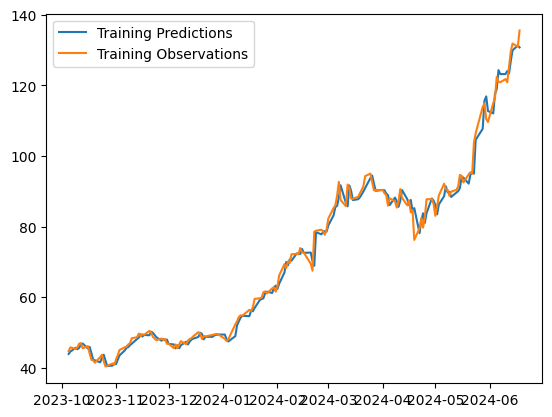

In [13]:
train_predict = model.predict(x_train).flatten()

plt.plot(dates_train, train_predict)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_training.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


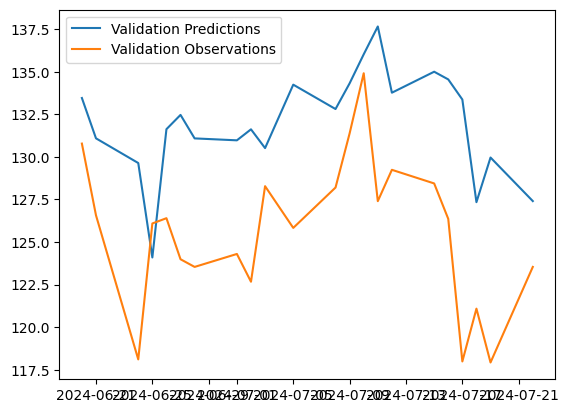

In [14]:
val_predict = model.predict(x_val).flatten()

plt.plot(dates_val, val_predict)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_validation.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


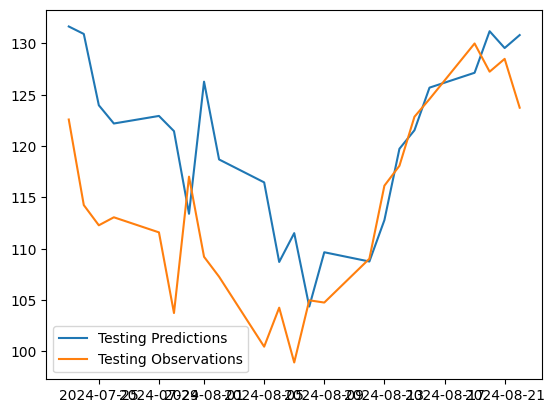

In [15]:
test_predict = model.predict(x_test).flatten()

plt.plot(dates_test, test_predict)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_testing.png"
plt.savefig(save_path)

In [16]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.
